In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from tueplots import bundles
from sklearn.linear_model import LinearRegression
import scipy as sp

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing


plt.rcParams.update(bundles.neurips2021())

In [3]:
#reading and preprocessing the data
data_2021 = pd.read_csv("Data/2021.csv")
data_2021 = data_2021.rename(columns={"Country or region":"Country name"}) # Change name of country column
data_2021 = data_2021.iloc[:,1:] # Get rid of "Overall rank"
data_2021 = data_2021.dropna()


In [4]:
#extracting happiness score (dependent variable) and key features (predictor variables)
happiness_score = data_2021["Ladder score"].values
predictors = data_2021[['Logged GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices', 'Generosity', 'Perceptions of corruption']].values

In [5]:
#function to calculate the vif scores of the predictor variables

def vif(predictor_vars):

    corrcoeff= np.corrcoef(predictor_vars, rowvar=False)
    VIF = np.linalg.inv(corrcoeff)
    return VIF.diagonal()


In [6]:
#Linear Regression on scaled data
scaler = preprocessing.StandardScaler().fit(predictors)
predictors_scaled = scaler.transform(predictors)
lr_scaled = LinearRegression(fit_intercept=True).fit(predictors_scaled, happiness_score)

labels = ['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
x_ = np.arange(len(labels))



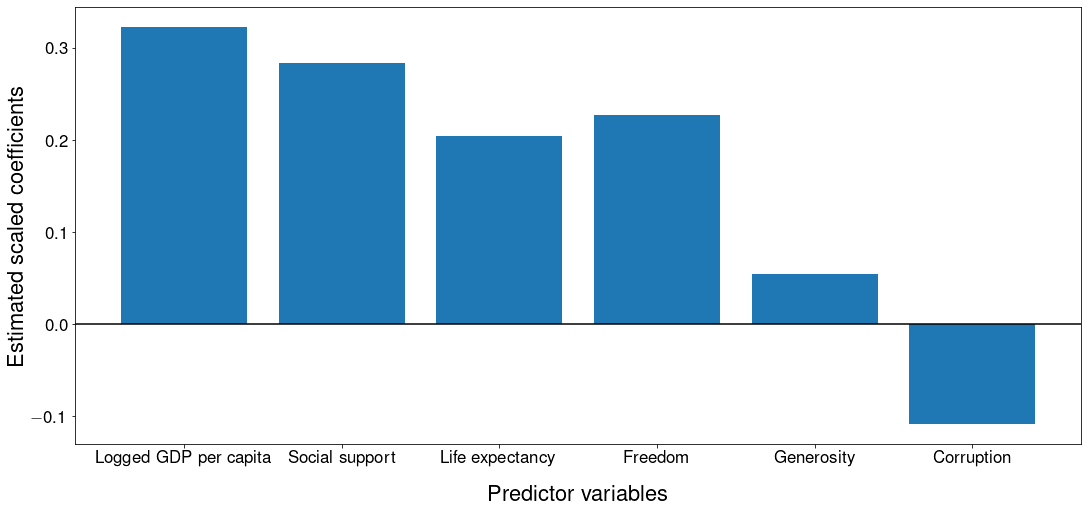

[ 0.32277859  0.28353261  0.20429428  0.22708367  0.05471205 -0.10808384]
[5.10489044 2.97219999 4.09934831 1.58580686 1.18098221 1.36712225]


In [7]:


#plotting coefficients
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.bar(x_, lr_scaled.coef_)
ax.set_xticks(x_)
#ax.set_xticklabels(labels, rotation=90)
short_labels = ["Logged GDP per capita", "Social support", "Life expectancy", "Freedom", "Generosity", "Corruption"]
ax.set_xticklabels(short_labels)
plt.xlabel("Predictor variables",size=22,labelpad=18)
plt.xticks(size=17)
plt.ylabel("Estimated scaled coefficients",size=22)
plt.yticks(size=17)
plt.axhline(0,color="black")
plt.show();
print(lr_scaled.coef_)
# SAVE AS PDF
fig.savefig('scaled_coefficients.pdf',bbox_inches='tight')

#calculating vif scores of predictor variables
print(vif(predictors))

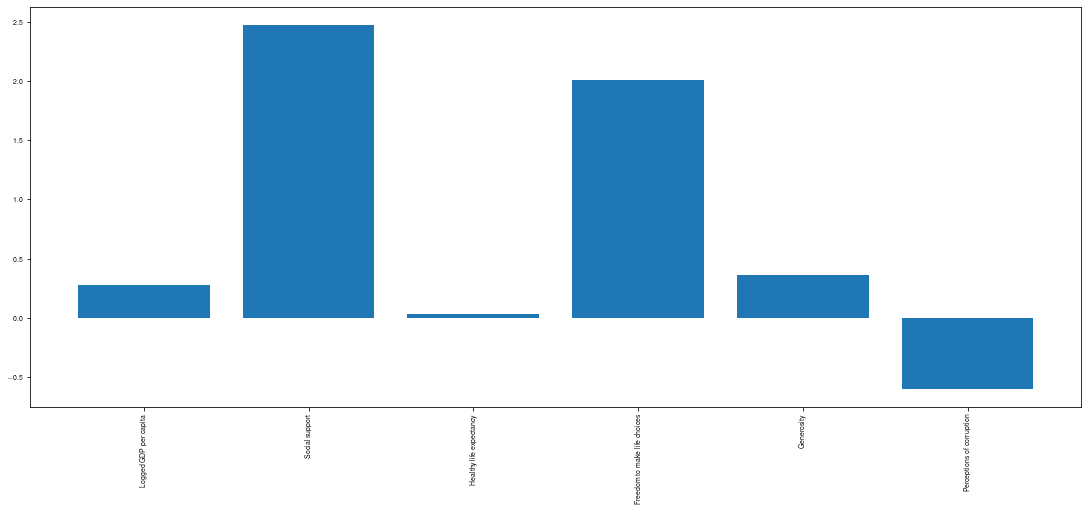

[ 0.2795329   2.47620585  0.03031381  2.0104647   0.36438194 -0.60509177]


In [8]:
#Linear Regression on unscaled data (for making happiness score predictions on original data)

lr = LinearRegression(fit_intercept=True).fit(predictors, happiness_score)

labels = ['Logged GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
x_ = np.arange(len(labels))

#plotting coefficients
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.bar(x_, lr.coef_)
ax.set_xticks(x_)
ax.set_xticklabels(labels, rotation=90)
plt.show();
print(lr.coef_)


In [9]:
#calulating predictions based on regression coefficients
preds = predictors @ lr.coef_ + lr.intercept_
scores = data_2021["Ladder score"]


#calculating MSE
error = sum((preds-scores)**2)/len(preds)
print("MSE: " + str(error))




MSE: 0.27969455549680133


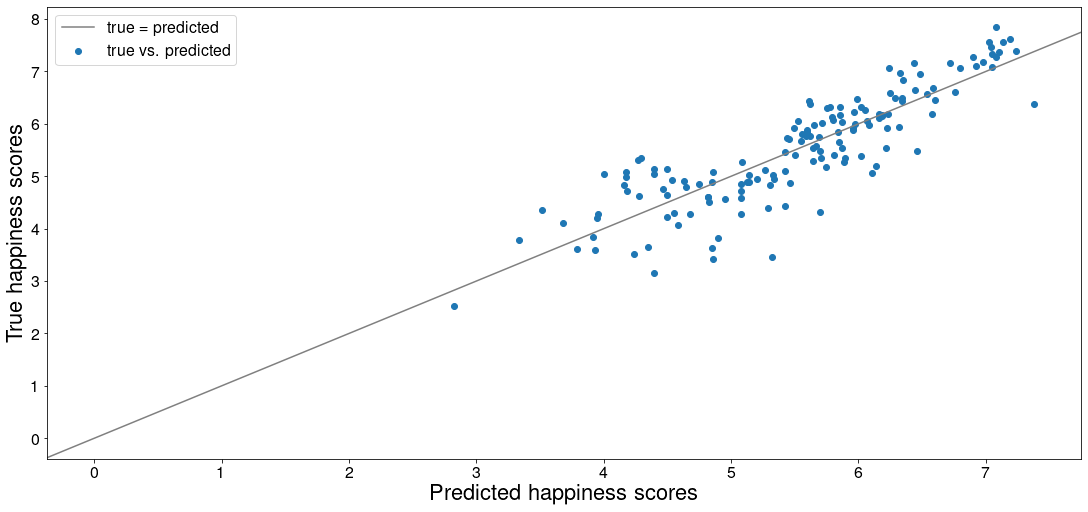

In [10]:
#plotting predictions vs actual values
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.scatter(preds, scores, label = 'true vs. predicted')
ax.axline([0, 0], [1, 1],color = 'grey', label = 'true = predicted')
plt.xlabel("Predicted happiness scores",size=22)
plt.xticks(size=16)
plt.ylabel("True happiness scores",size=22)
plt.yticks(size=16)
plt.legend(fontsize=16)
fig.savefig('true_vs_predicted.pdf',bbox_inches='tight')

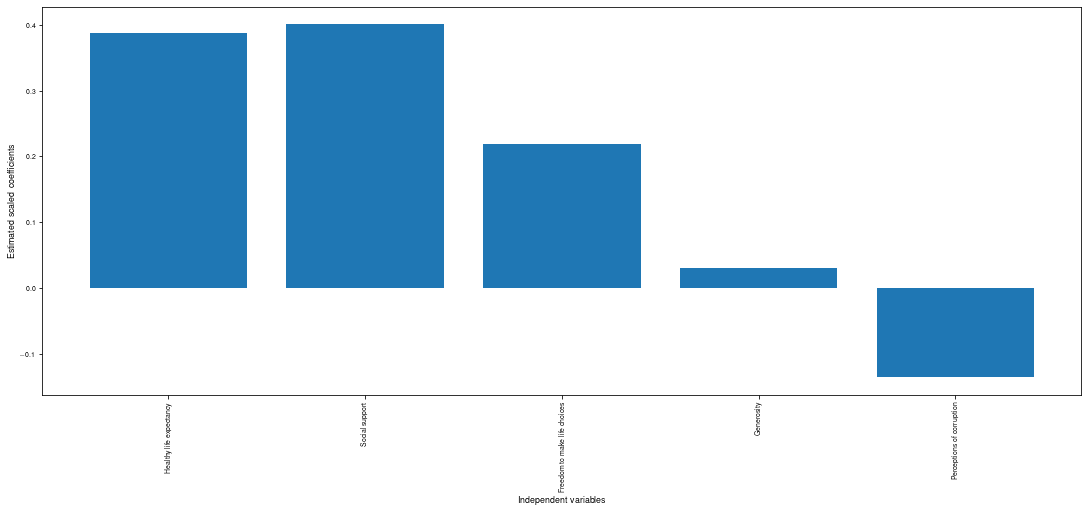

In [11]:
#excluding 'logged GDP per capita' from Linear Regression model
predictors_droppedGDP = data_2021[['Healthy life expectancy', 'Social support','Freedom to make life choices', 'Generosity', 'Perceptions of corruption']].values

scaler_droppedGDP = preprocessing.StandardScaler().fit(predictors_droppedGDP)
predictors_droppedGDP_scaled = scaler_droppedGDP.transform(predictors_droppedGDP)

lr_droppedGDP_scaled= LinearRegression(fit_intercept=True).fit(predictors_droppedGDP_scaled, happiness_score)

labels_droppedGDP = ['Healthy life expectancy','Social support','Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
x_droppedGDP = np.arange(len(labels_droppedGDP))


fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.bar(x_droppedGDP, lr_droppedGDP_scaled.coef_)
ax.set_xticks(x_droppedGDP)
ax.set_xticklabels(labels_droppedGDP, rotation=90)
plt.xlabel("Independent variables")
plt.ylabel("Estimated scaled coefficients")
plt.show();

fig.savefig('scaled_coefficients_droppedDGP.pdf',bbox_inches='tight')


MSE: 0.30010361565503835
VIF: [2.46502868 2.30279059 1.58262818 1.15160801 1.3302077 ]


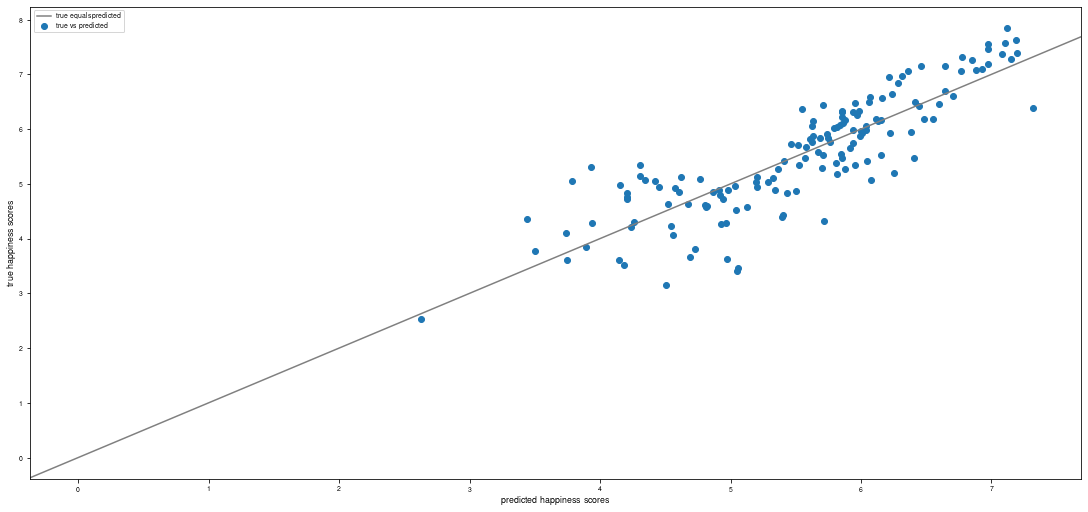

In [12]:
#calulating and plotting predictions based on scaled regression coefficient (with logged GDP excluded from the regression model)

labels_drop = ['Healthy life expectancy','Social support','Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
x_drop = np.arange(len(labels_drop))

preds_droppedGDP = predictors_droppedGDP_scaled @ lr_droppedGDP_scaled.coef_ + lr_droppedGDP_scaled.intercept_
scores = data_2021["Ladder score"]
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.scatter(preds_droppedGDP, scores, label = 'true vs predicted')
ax.axline([0, 0], [1, 1], color = 'grey', label = 'true equals predicted')
plt.xlabel("predicted happiness scores ")
plt.ylabel("true happiness scores")
plt.legend()


error_droppedGDP = sum((preds_droppedGDP-scores)**2)/len(preds_droppedGDP)
print("MSE: " + str(error_droppedGDP))

print("VIF: "+ str(vif(predictors_droppedGDP)))


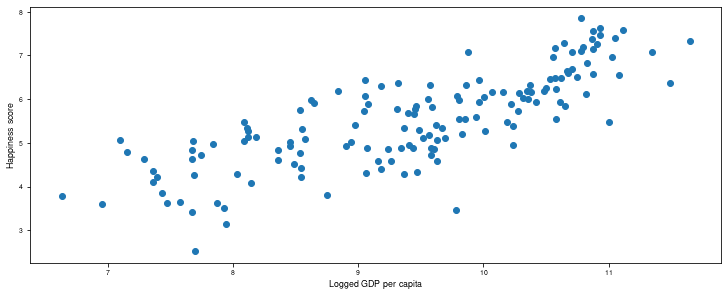

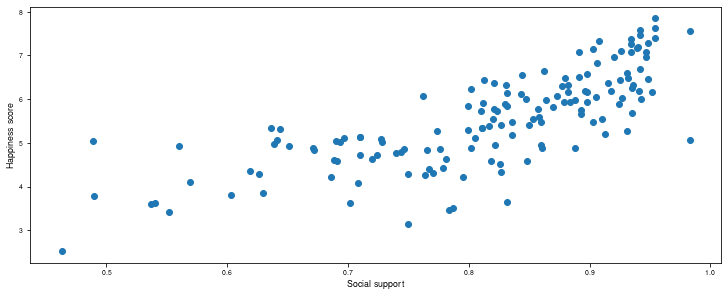

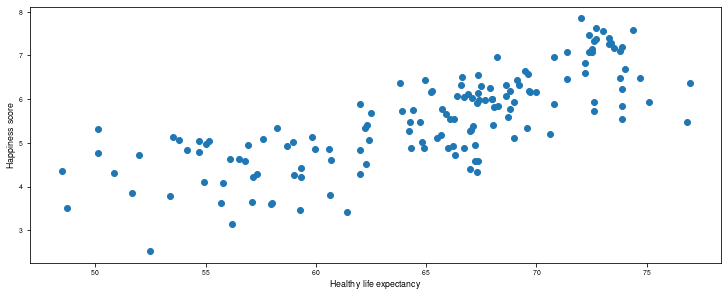

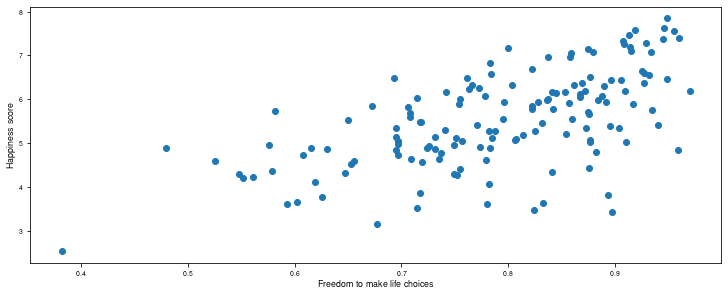

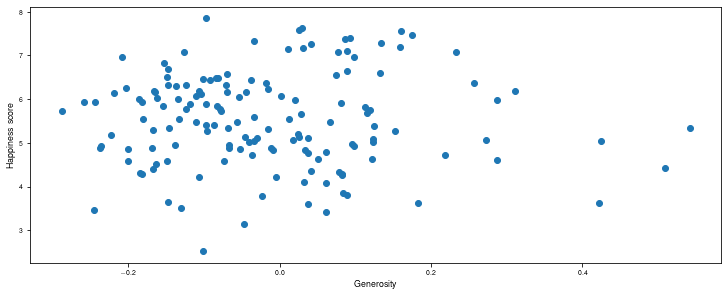

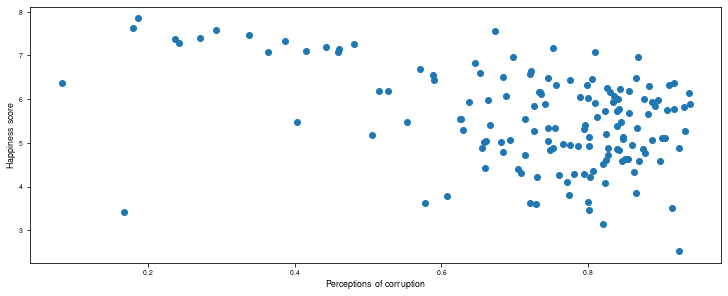

In [13]:
#checking for linearity of predictor variables
for l in labels:
    plt.figure(figsize=(10, 4))
    plt.scatter(data_2021[l].values, data_2021["Ladder score"].values)
    plt.xlabel(l)
    plt.ylabel("Happiness score")
    plt.show();
    